In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('/content/sample_data/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Species is the target label.

In [16]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [17]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [20]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [21]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


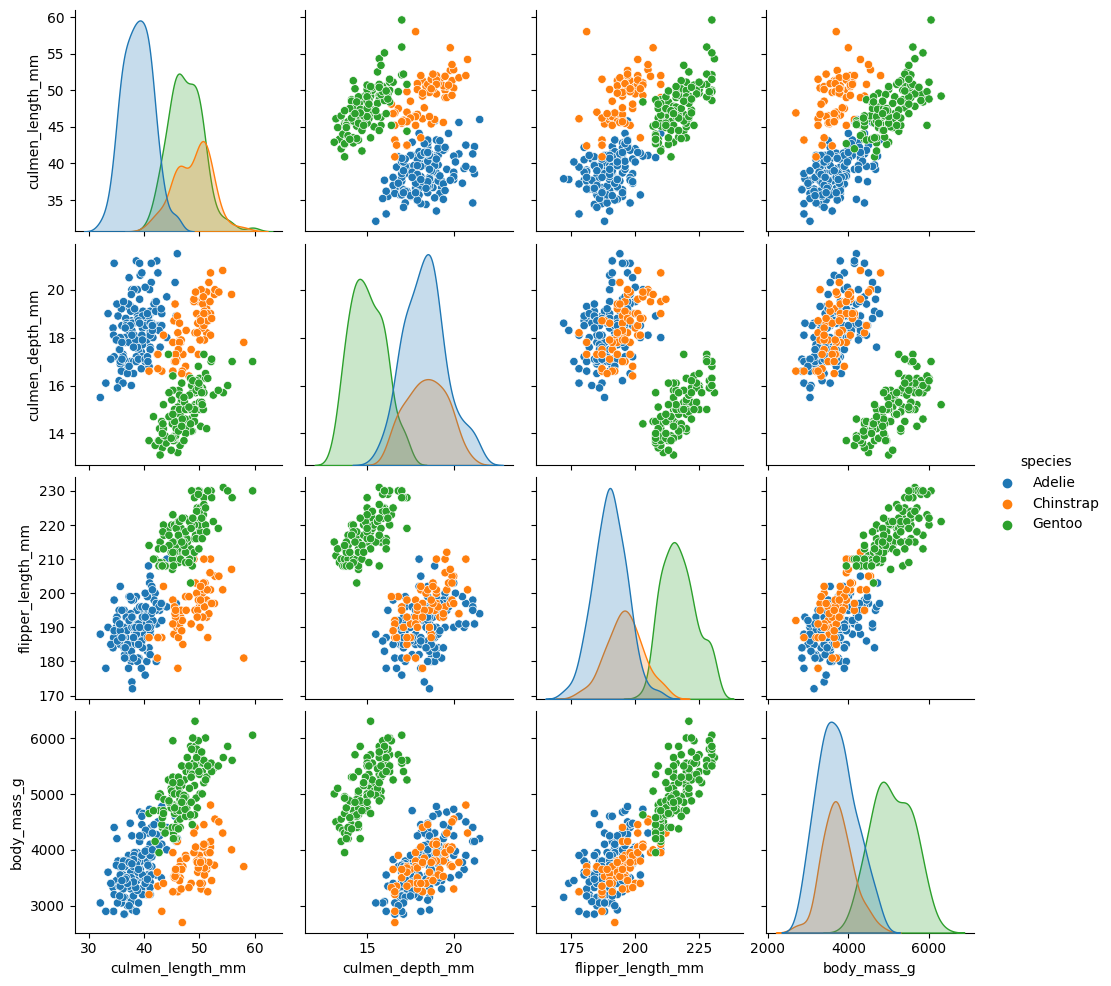

In [22]:
sns.pairplot(df, hue = 'species');

Decision tree classifier cannot work on categorical columns having string values. It needs to convert them to numeric values. We can do this one hot encoding.

In [24]:
X = pd.get_dummies(df.drop('species', axis = 1))
y = df['species']

We use scaling when we have to compare multiple features at the same time. So they must have same units.

But in Decision Tree, we compare one feature with the remaining dataset. So, we dont need to scale them.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
predictions = model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        48
   Chinstrap       1.00      1.00      1.00        28
      Gentoo       1.00      1.00      1.00        35

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111



The following option is only available in decision tree.

In [33]:
model.feature_importances_

array([0.34457606, 0.06904182, 0.53453085, 0.        , 0.        ,
       0.03047746, 0.        , 0.        , 0.0213738 , 0.        ])

In [34]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen',
       'sex_.', 'sex_FEMALE', 'sex_MALE'],
      dtype='object')

Let's compare them properly.

In [37]:
pd.DataFrame(index = X.columns, data = model.feature_importances_, columns = ['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
body_mass_g,0.000000
island_Biscoe,0.000000
island_Torgersen,0.000000
sex_.,0.000000
sex_MALE,0.000000
sex_FEMALE,0.021374
island_Dream,0.030477
culmen_depth_mm,0.069042
culmen_length_mm,0.344576
flipper_length_mm,0.534531


Let's plot this tree.

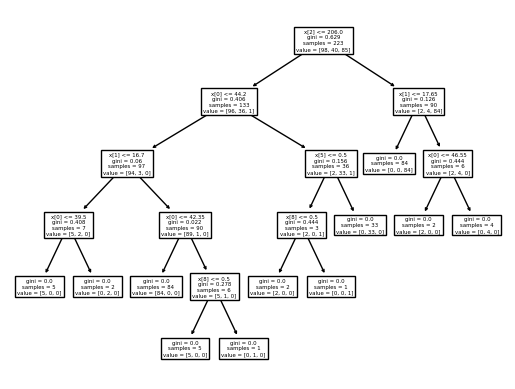

In [39]:
from sklearn.tree import plot_tree

plot_tree(model);

To print it more clear:

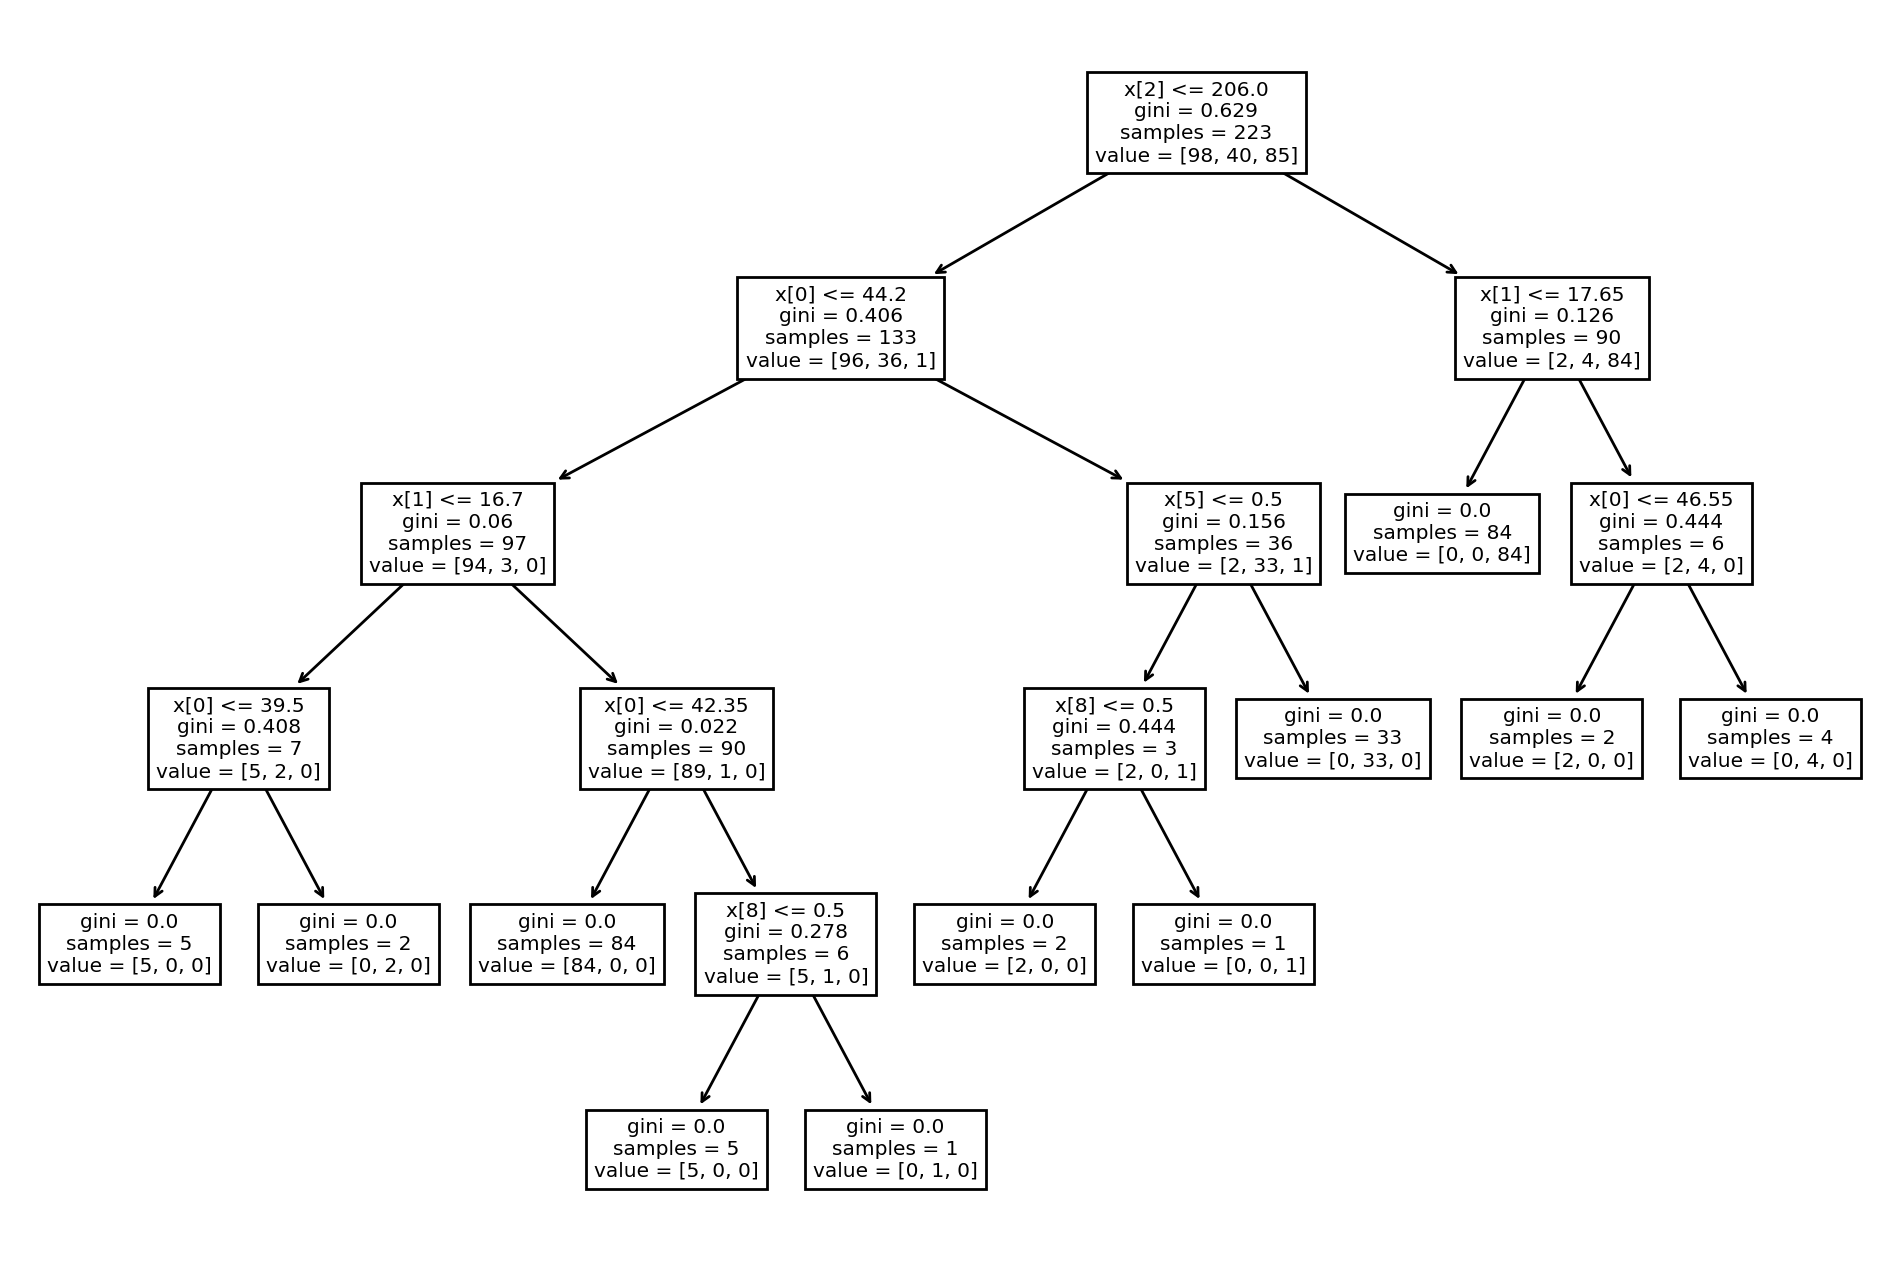

In [41]:
plt.figure(figsize=(12,8), dpi = 200)
plot_tree(model);

Now, we dont know what this X[0] etc means. So, lets use the feature names on its place.

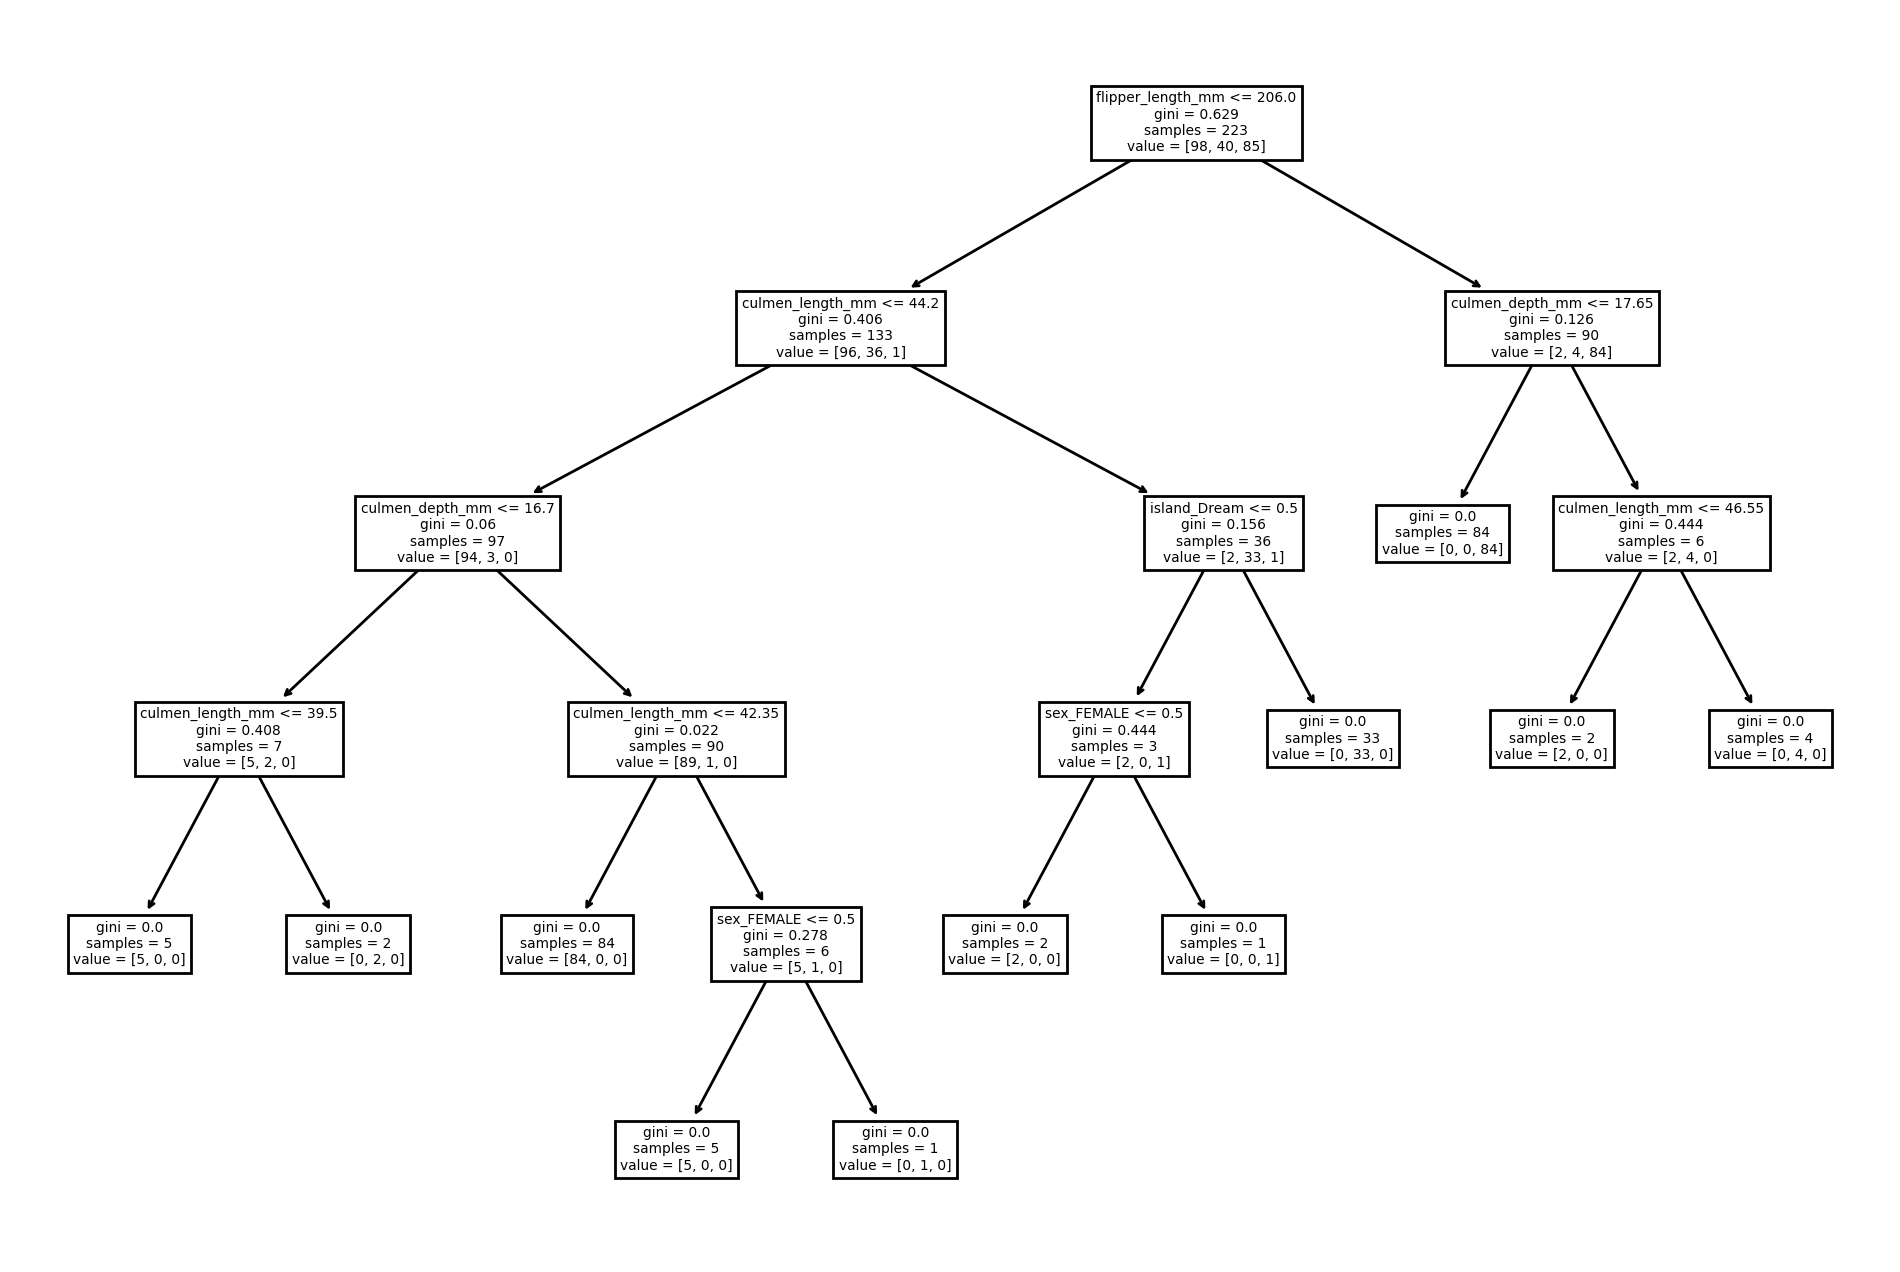

In [42]:
plt.figure(figsize=(12,8), dpi = 200)
plot_tree(model, feature_names = X.columns);

To fill with different colors:

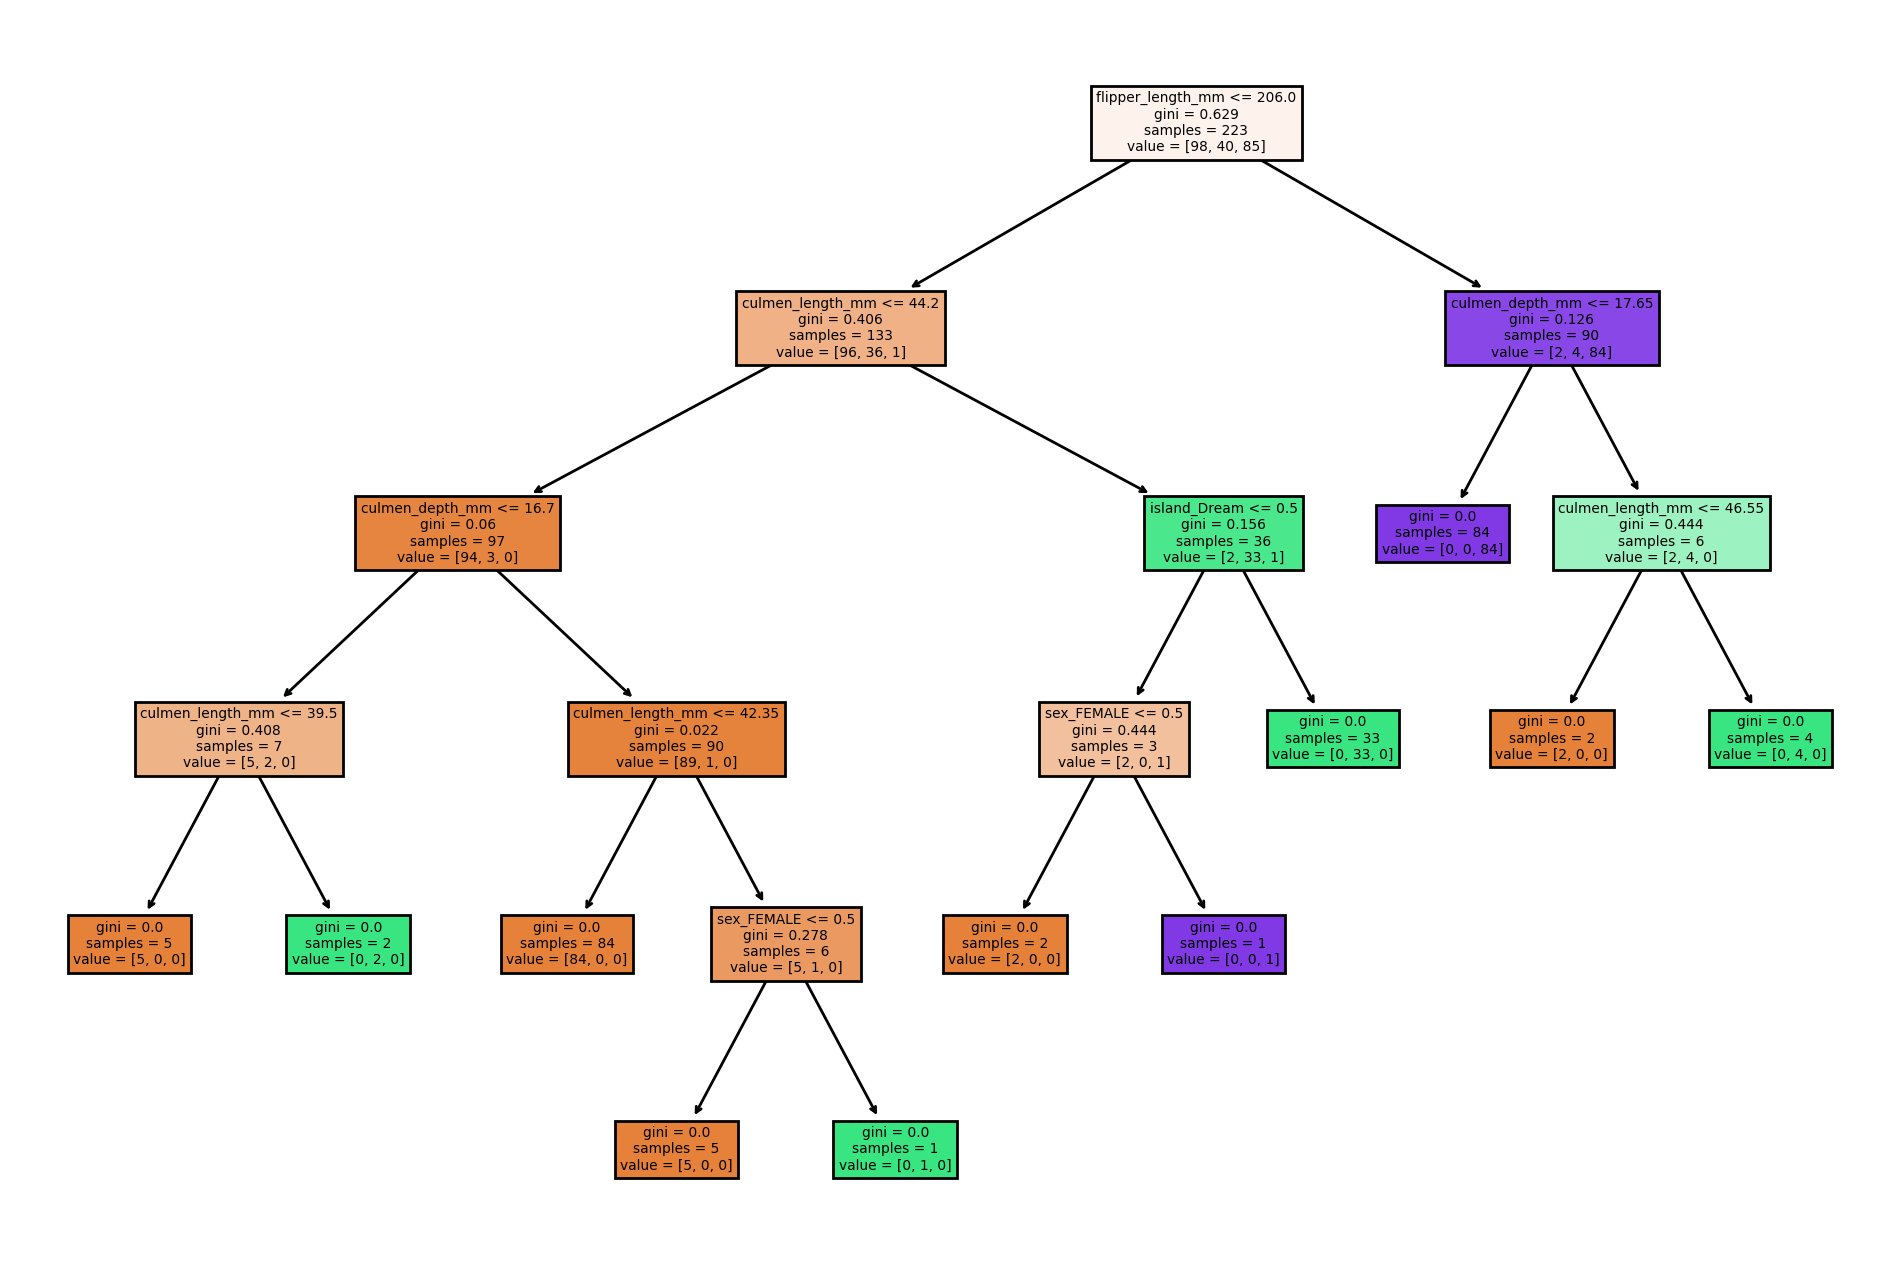

In [43]:
plt.figure(figsize=(12,8), dpi = 200)
plot_tree(model, feature_names = X.columns, filled = True);

We can see in the root node:

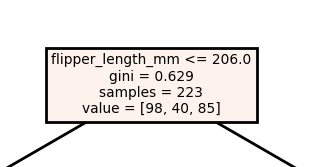

98 + 40 + 85 = 223

so 223 are the total instances in the training. 98 are instances of one class, 40 of second and 85 of third.

In [45]:
len(X_train)

223

We can see in the end, some are having like [5,0,0] it means they are correctly classifying to one class.

Let's prune it to 2.

In [46]:
def report_model(model):
  predictions = model.predict(X_test)

  print(classification_report(y_test, predictions))
  print('\n')

  plt.figure(figsize=(12,8), dpi = 200)
  plot_tree(model, feature_names = X.columns, filled = True);


              precision    recall  f1-score   support

      Adelie       0.94      0.98      0.96        48
   Chinstrap       0.96      0.89      0.93        28
      Gentoo       1.00      1.00      1.00        35

    accuracy                           0.96       111
   macro avg       0.97      0.96      0.96       111
weighted avg       0.96      0.96      0.96       111





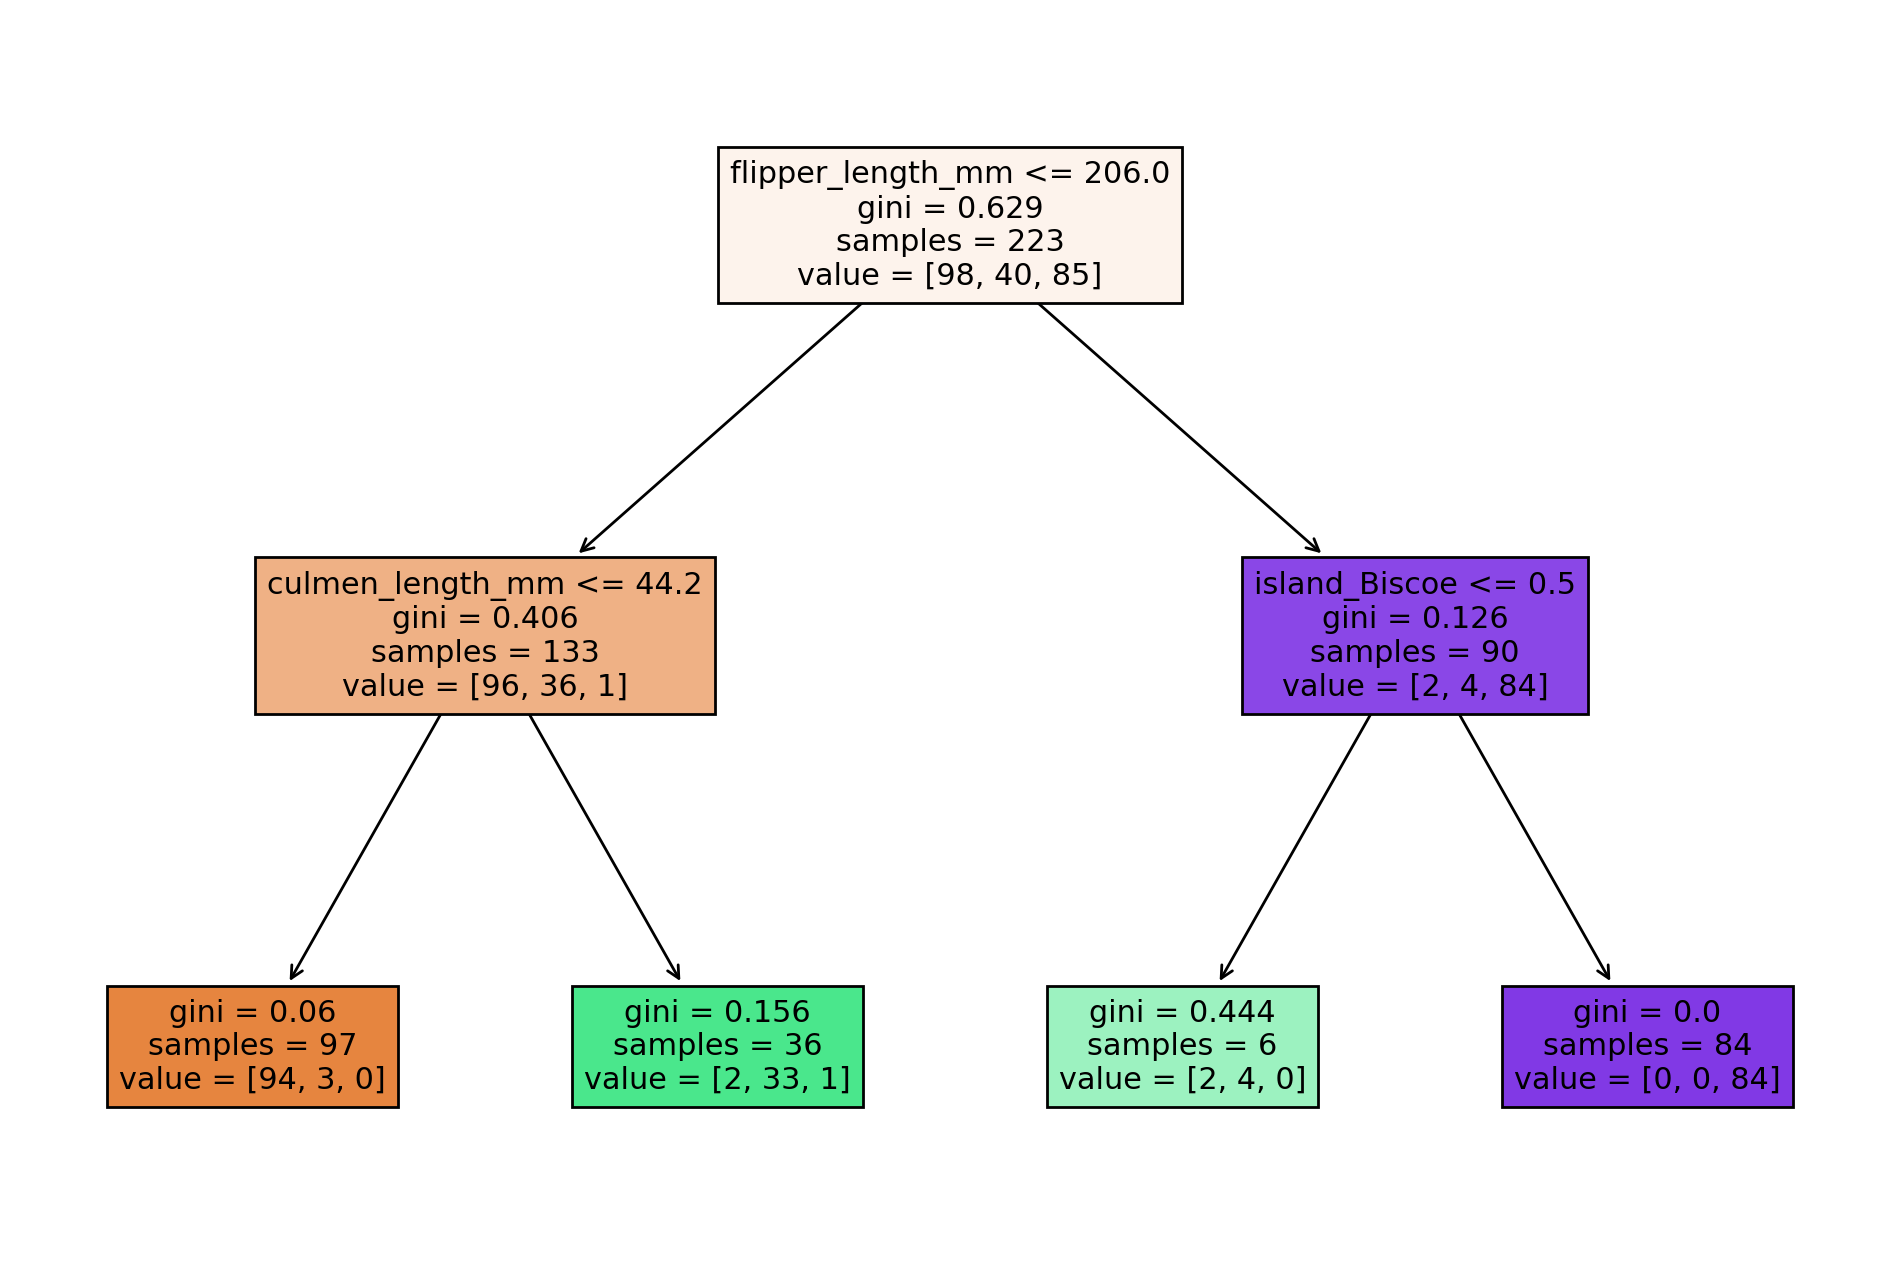

In [47]:
pruned_tree = DecisionTreeClassifier(max_depth = 2)
pruned_tree.fit(X_train, y_train)
report_model(pruned_tree)

We can see with pruning, we got a comparatively little precision and recall. But a clear decision tree!

Just to note, if we put max_depth=13, to lazmi ni DT itni depth tk e jaye. bs apni max depth tk e jaye ga jitni b hui.

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.96      0.98        28
      Gentoo       1.00      1.00      1.00        35

    accuracy                           0.99       111
   macro avg       0.99      0.99      0.99       111
weighted avg       0.99      0.99      0.99       111





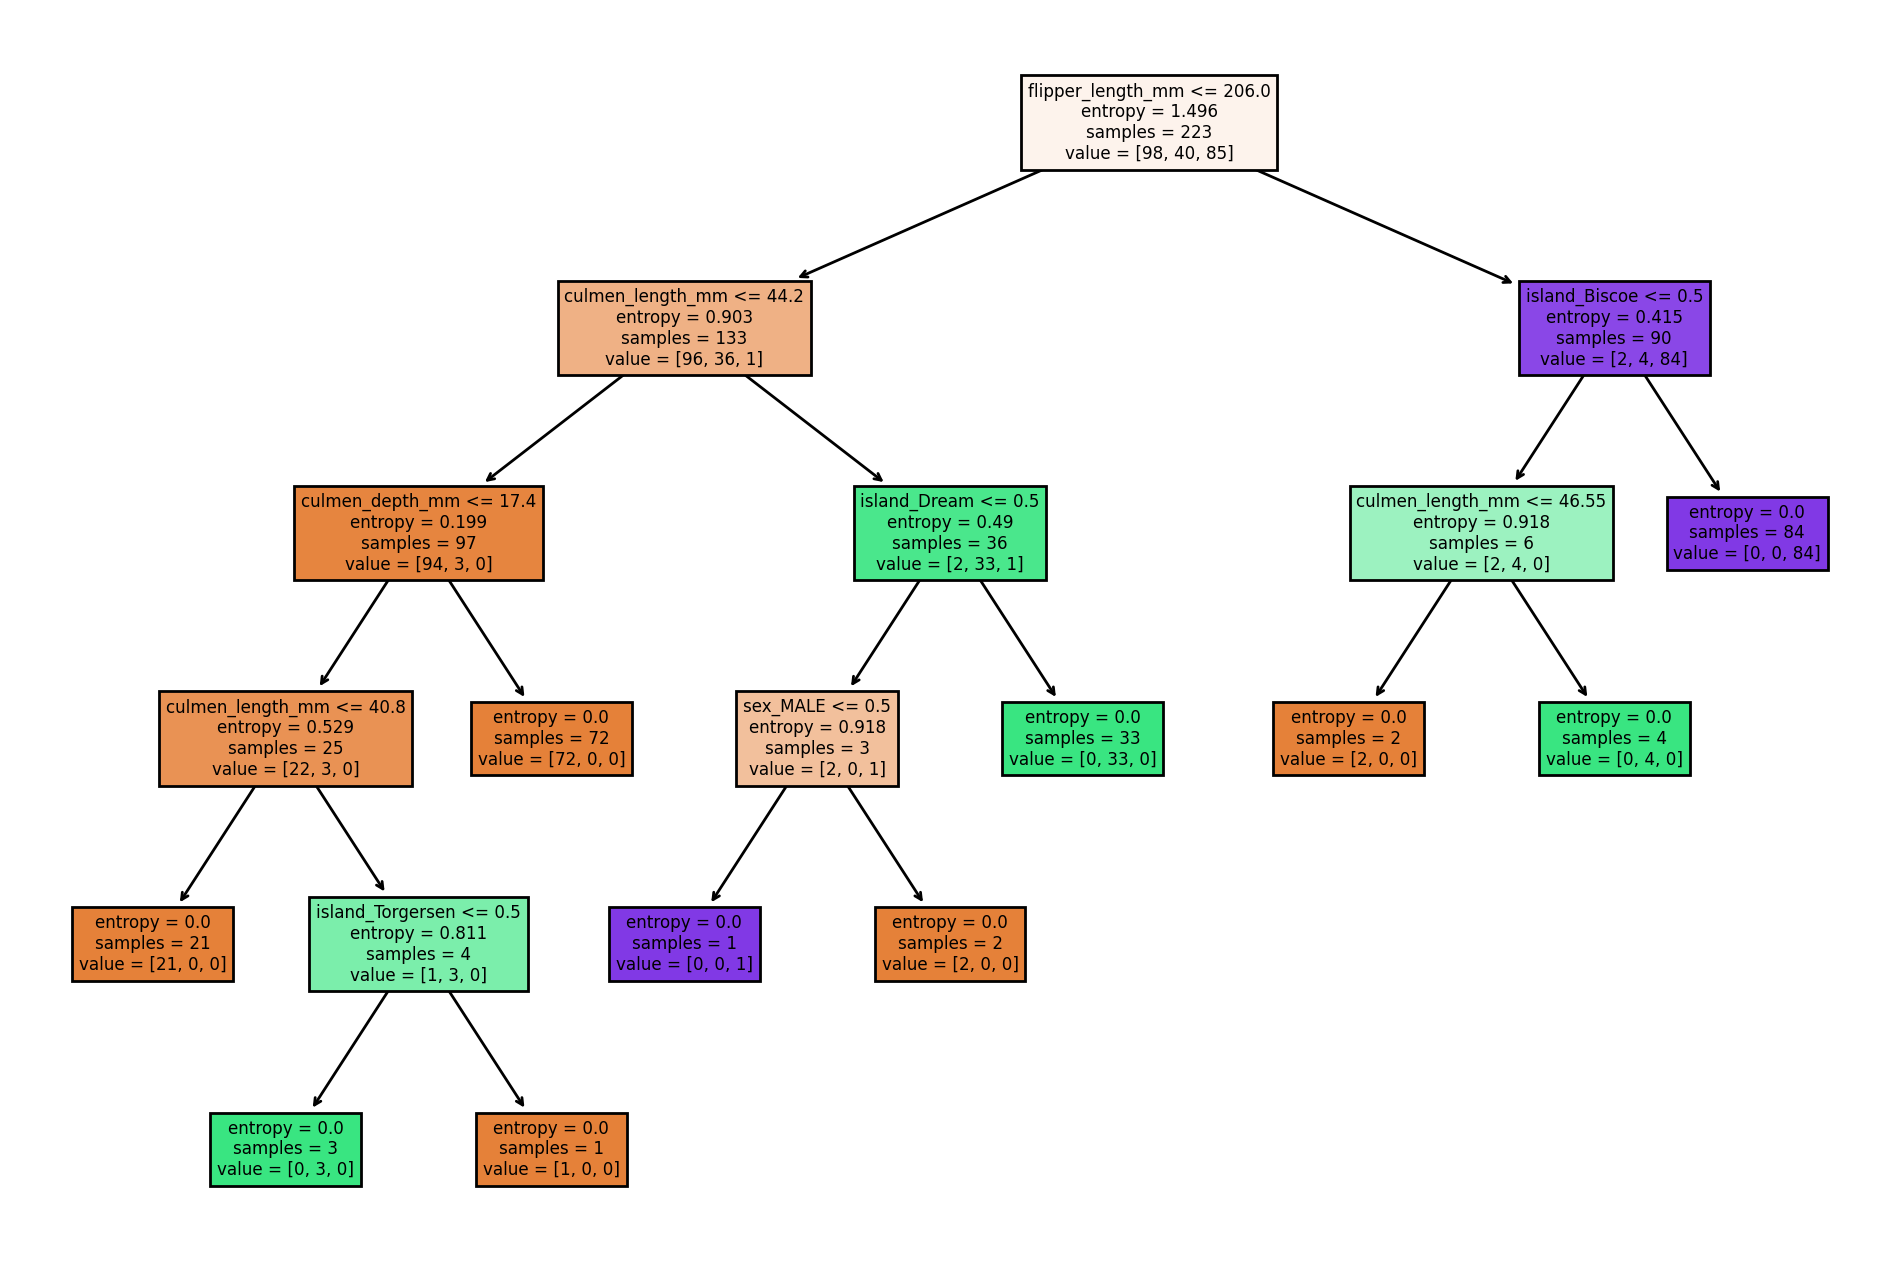

In [48]:
entropy_tree = DecisionTreeClassifier(criterion = 'entropy')
entropy_tree.fit(X_train, y_train)
report_model(entropy_tree)

Entropy means information gain. By default, it is set as 'gini impurity'. We can use entropy. We can see that with entropy, it has performed good but the values got changed totally because we are calculating entropy in it, not gini impurity.